In [224]:
import numpy
import scipy as spicy
import math
import matplotlib.pyplot as plt
mat = spicy.io.loadmat('dset.mat', squeeze_me=True)

In [198]:
def task1_1(X, Y):
    N = len(X)
    D = len(X[0])
    
    x_bar = X.sum((0,))/N
    
    X_st = [numpy.asmatrix(x-x_bar) for x in X]
    S = sum([(x.transpose()@x).A for x in X_st])/N
    spicy.io.savemat('t1_S.mat', dict(S=S))
    
    sqrtd_vrns = [math.sqrt(S.item(i,i)) for i in range(D)]
    
    R = [
        S[i] / sqrtd_vrns / sqrtd_vrns[i]
        for i in range(D)
    ]
    
    spicy.io.savemat('t1_R.mat', dict(R=R))

[(1, 2), (11, 12), (18, 19)]


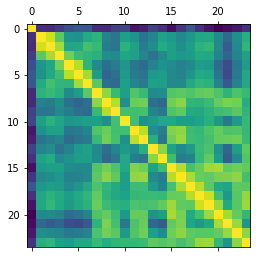

In [235]:
# task 1_2
task1_1(mat['X'], mat['Y_species'])
test_mat = spicy.io.loadmat('t1_R.mat')
R = test_mat['R']
#print(R)
plt.matshow(R)
D = len(R)
print([(i,j) for i in range (D) for j in range(D) if (i < j and abs(R.item(i,j))>0.85)])
plt.show()

In [246]:
Cov = spicy.io.loadmat('t1_S.mat')['S']
D = len(Cov)
EVals_orig, EVecs_orig = numpy.linalg.eig(Cov)

sorted_evals = sorted(zip(EVals_orig, range(D)), reverse=True)
EVals = [EVals_orig[i] for (_,i) in sorted_evals]

def norm_EV(v):
    if v.item(0) > 0:
        return v
    else:
        return -v

EVecs = [norm_EV(EVecs_orig[i]) for (_,i) in sorted_evals]

spicy.io.savemat('t1_EVecs.mat', dict(EVecs=EVecs))
spicy.io.savemat('t1_EVals.mat', dict(EVals=EVals))

Cumvar = [sum(EVals[:(i+1)]) for i in range(D)]
spicy.io.savemat('t1_Cumvar.mat', dict(Cumvar=Cumvar))

def calcMinDims(variance_ratio):
    total_var = Cumvar[-1]
    indexed_Cumvar = zip(Cumvar, range(D))
    return min(
        [i+1 for (cv, i) in indexed_Cumvar \
             if cv >= total_var * variance_ratio]
    )
    
MinDims = [calcMinDims(perc/100) for perc in [70,80,90,95]]
spicy.io.savemat('t1_MinDims.mat', dict(MinDims=MinDims))

In [247]:
testmat = spicy.io.loadmat('t1_MinDims.mat')['MinDims']
print(testmat)

[[ 3  5  7 10]]
